In [1]:
import numpy as np
import os
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


# variables

In [3]:
np.random.seed(100)
batch_size = 128
labels = 10
epochs = 20

In [67]:
(x_train_ , y_train_) , (x_test_ , y_test_) = mnist.load_data()
x_train = x_train_.reshape(60000,784)
x_test = x_test_.reshape(10000,784)

In [68]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [69]:
x_train = (x_train -np.mean(x_train))/np.std(x_train)
x_test = (x_test -np.mean(x_test))/np.std(x_test)

# shape of data

In [70]:
print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


In [71]:
x_train/=255
x_test/=255

In [72]:
labels =10
y_train = np_utils.to_categorical(y_train,labels)
y_test = np_utils.to_categorical(y_test,labels)

In [73]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [74]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
model.fit(x_train,y_train,epochs=5,verbose=1,validation_data=(x_test,y_test),batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 334us/step - loss: 0.6434 - acc: 0.8162 - val_loss: 0.3034 - val_acc: 0.9109
Epoch 2/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.2954 - acc: 0.9120 - val_loss: 0.2236 - val_acc: 0.9325
Epoch 3/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.2233 - acc: 0.9339 - val_loss: 0.1735 - val_acc: 0.9480
Epoch 4/5
60000/60000 [==============================] - 15s 255us/step - loss: 0.1753 - acc: 0.9477 - val_loss: 0.1370 - val_acc: 0.9587
Epoch 5/5
60000/60000 [==============================] - 15s 257us/step - loss: 0.1443 - acc: 0.9571 - val_loss: 0.1178 - val_acc: 0.9628


In [76]:
score = model.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 110us/step


In [77]:
score[1]

0.9628

# Callbacks history (google history)

In [78]:
import keras

In [79]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [80]:
history = LossHistory()

In [81]:
model.fit(x_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(x_test, y_test), callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 13s 218us/step - loss: 0.1218 - acc: 0.9638 - val_loss: 0.1039 - val_acc: 0.9684


In [82]:
print(history.losses)

[0.26959556, 0.084431, 0.0664006, 0.119381785, 0.14516003, 0.08030293, 0.1378189, 0.12684095, 0.10501286, 0.12237835, 0.112791926, 0.17994982, 0.12150326, 0.15864305, 0.23812729, 0.12216793, 0.0642079, 0.05672116, 0.0737747, 0.08516404, 0.107878655, 0.07171188, 0.14623779, 0.18573454, 0.114632204, 0.21194929, 0.07854673, 0.18266386, 0.08200428, 0.12684518, 0.05106365, 0.16512448, 0.18240565, 0.12245728, 0.14532433, 0.11252062, 0.28521198, 0.069196336, 0.1020225, 0.101825766, 0.10127031, 0.103400186, 0.11992995, 0.086615324, 0.1015174, 0.15212159, 0.11904257, 0.10610078, 0.15014872, 0.09872113, 0.10416564, 0.106810614, 0.13775511, 0.14603281, 0.07908912, 0.20063958, 0.13533461, 0.19199136, 0.08006394, 0.053984974, 0.25751686, 0.086550005, 0.11007413, 0.17771375, 0.20341466, 0.062020615, 0.06517248, 0.079132125, 0.11561572, 0.16247962, 0.18149568, 0.12976983, 0.20023662, 0.12206541, 0.19196963, 0.13258013, 0.11470376, 0.08028895, 0.112844214, 0.14536598, 0.2058475, 0.14887023, 0.21587358

# save models

In [27]:
pwd

'C:\\Users\\User\\ANalytics'

In [83]:
model.save_weights('../datas/mnist_lr_weights.h5', overwrite=True)

In [84]:
model.save('../datas/mnist_lr.h5')

In [85]:
from keras.models import load_model

In [86]:
model_new = load_model('../datas/mnist_lr.h5')

In [87]:
preds=model_new.predict(x_test)

In [88]:
preds[0]

array([1.00044645e-05, 1.74921399e-06, 4.31989785e-04, 1.05334492e-03,
       6.15954647e-08, 1.77043330e-05, 1.62125036e-10, 9.98300850e-01,
       6.58693125e-06, 1.77791109e-04], dtype=float32)

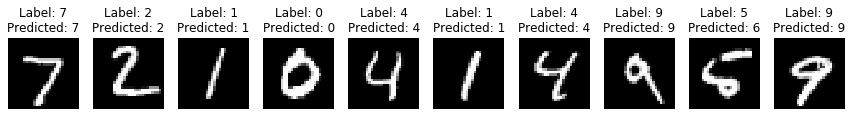

In [90]:
import matplotlib.pyplot as plt
import numpy as np
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test_[i], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(y_test_[i], np.argmax(preds[i])))
    plt.axis('off')
plt.show()